In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('./fcc-forum-pageviews.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date')

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
(df['value'] >= df['value'].quantile(0.025))

0       False
1       False
2       False
3       False
4       False
        ...  
1299     True
1300     True
1301     True
1302     True
1303     True
Name: value, Length: 1304, dtype: bool

In [5]:
(df['value'] <= df['value'].quantile(0.975))

0        True
1        True
2        True
3        True
4        True
        ...  
1299     True
1300     True
1301     True
1302    False
1303     True
Name: value, Length: 1304, dtype: bool

In [6]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [7]:
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


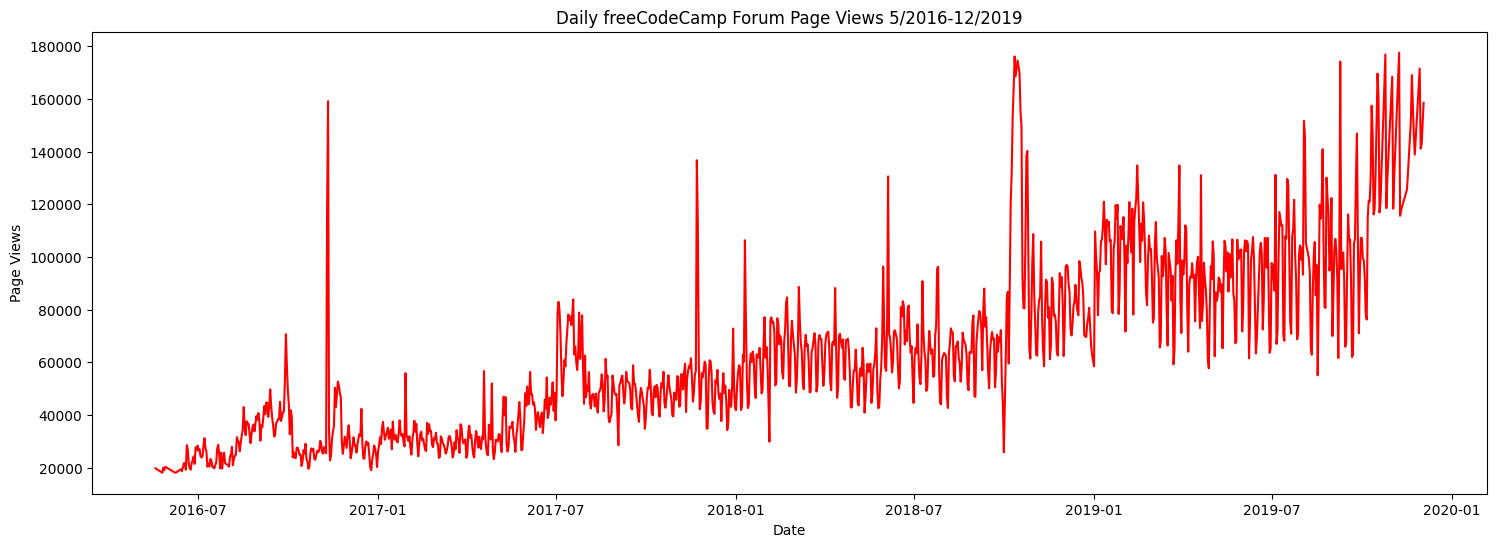

In [8]:
fig = plt.figure(figsize=(18, 6))
plt.plot(df['date'], df['value'], linestyle='-', color='r')

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

plt.show()

In [9]:
fig.savefig('line_plot.png')

In [10]:
df_bar = df.copy()

df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month

monthly_avg = df_bar.groupby(['year', 'month']).agg({'value': 'mean'}).reset_index()

In [11]:
monthly_avg

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [12]:
pivoted_df = monthly_avg.pivot(index='year', columns='month', values='value')

In [13]:
pivoted_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


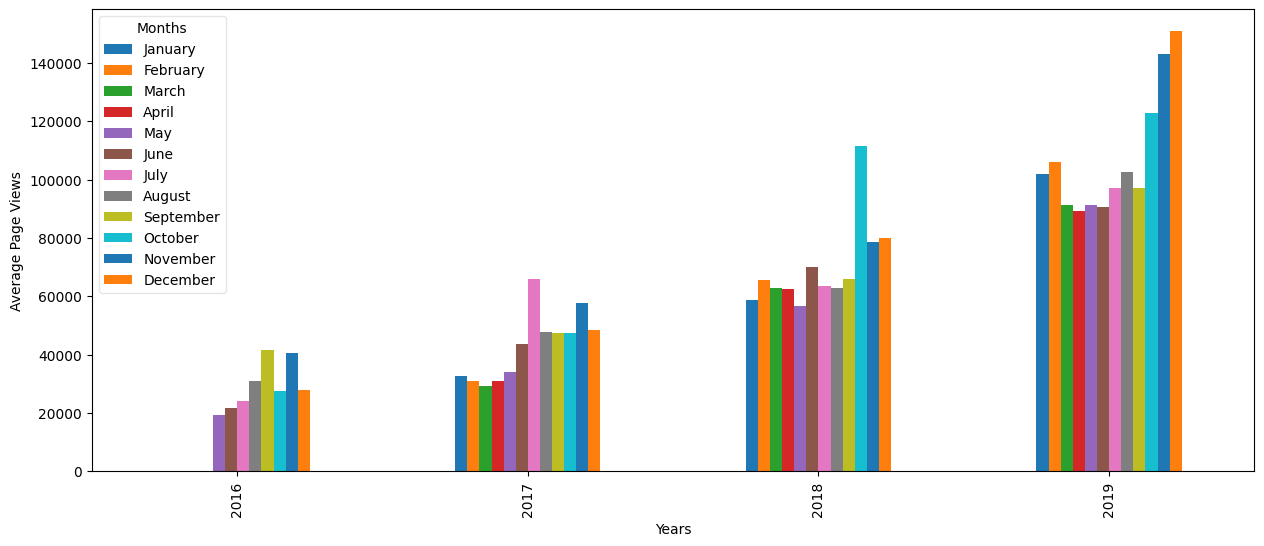

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
pivoted_df.plot(kind='bar', ax=ax)

ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    title='Months',
    loc='upper left',
    frameon=True,
    framealpha=0.5)

In [15]:
# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

In [16]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [17]:
df_box

,index,date,value,year,month
0,10,2016-05-19,19736,2016,May
1,17,2016-05-26,18060,2016,May
2,18,2016-05-27,19997,2016,May
3,19,2016-05-28,19044,2016,May
4,20,2016-05-29,20325,2016,May
...,...,...,...,...,...
1233,1294,2019-11-24,138875,2019,Nov
1234,1299,2019-11-29,171584,2019,Nov
1235,1300,2019-11-30,141161,2019,Nov
1236,1301,2019-12-01,142918,2019,Dec


/tmp/ipykernel_13756/1120270097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df_box, palette='pastel', ax=ax1)
/tmp/ipykernel_13756/1120270097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df_box, palette='deep', ax=ax2)


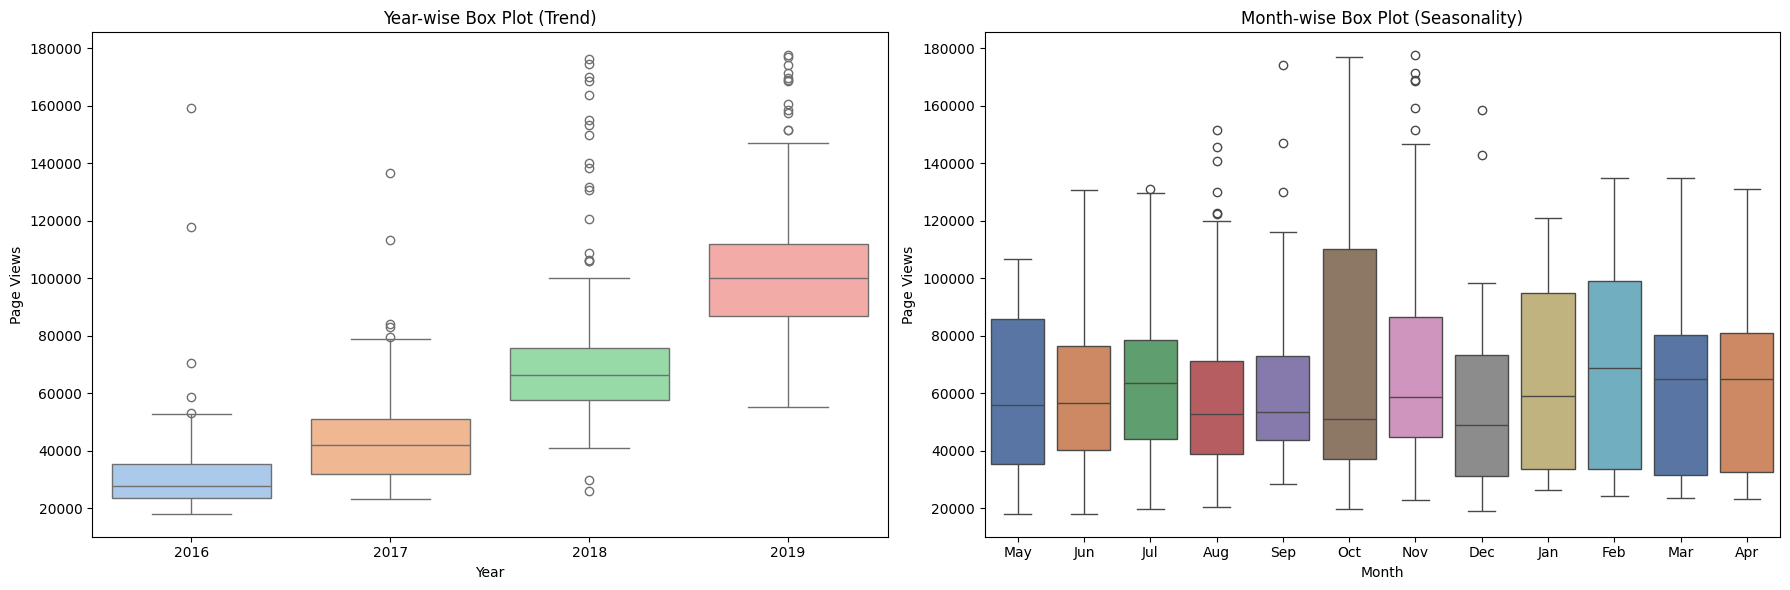

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.boxplot(x='year', y='value', data=df_box, palette='pastel', ax=ax1)
sns.boxplot(x='month', y='value', data=df_box, palette='deep', ax=ax2)

# Customize the plot
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.tight_layout()

In [19]:
fig.savefig('box_plot.png')